In [1]:
%load_ext autoreload
%autoreload 2
%load_ext autotime

In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

from tqdm.notebook import  tqdm

time: 515 ms


In [3]:
train_set = pd.read_csv("../WorldtreeExplanationCorpusV2.1_Feb2020/questions/questions.train.tsv", delimiter="\t")
print(f"Training set size: {len(train_set)}")

dev_set = pd.read_csv("../WorldtreeExplanationCorpusV2.1_Feb2020/questions/questions.dev.tsv", delimiter="\t")
print(f"Dev set size: {len(dev_set)}")

test_set = pd.read_csv("../WorldtreeExplanationCorpusV2.1_Feb2020/questions/questions.test.tsv", delimiter="\t")
print(f"Test set size: {len(test_set)}")

Training set size: 2207
Dev set size: 496
Test set size: 1664
time: 44.6 ms


In [4]:
# questions
train_set.iloc[0]["question"]

'Which of the following best explains why the Sun appears to move across the sky every day? (A) The Sun rotates on its axis. (B) Earth rotates on its axis. (C) The Sun orbits around Earth. (D) Earth orbits around the Sun.'

time: 4.23 ms


In [5]:
# explanation
train_set.iloc[0]["explanation"]

'73fa-1e22-26a8-1a7c|CENTRAL 5be6-58b4-ec52-40b2|GROUNDING e565-87e6-6f00-1598|CENTRAL d257-69b5-a1b9-f7e7|GROUNDING 0da9-2984-f126-bcad|GROUNDING 825b-a440-75bd-3001|CENTRAL e473-7297-61c1-56fa|GROUNDING af26-8083-b908-7d3b|GROUNDING dbe8-e776-f804-99a0|GROUNDING 395b-4954-311f-4749|CENTRAL'

time: 3.68 ms


In [6]:
all_dataset = pd.concat([train_set, dev_set, test_set])
all_explanations = set()

for _, question in tqdm(all_dataset.iterrows()):
    if not pd.isna(question["explanation"]):
        explanations = question["explanation"].split()
        explanations = [x.split("|")[0] for x in explanations]
        all_explanations.update(explanations)

print(f"These problems require an overall of {len(all_explanations)} explanations")


These problems require an overall of 7628 explanations
time: 489 ms


---
---
### Dataset Distribution

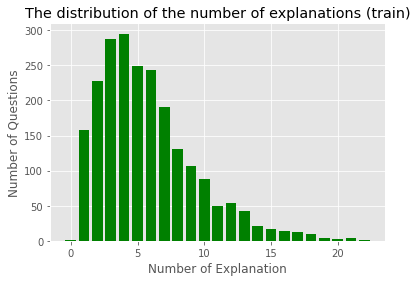

Mean number of explanation: 5.752152242863616
Max number of explanation: 22
time: 538 ms


In [7]:
num_distribution = []

for _, question in train_set.iterrows():
    if pd.isna(question["explanation"]):
        num_distribution.append(0)
    else:
        num_distribution.append(len(question["explanation"].split()))

counter = Counter(num_distribution)
x = sorted(counter)
y = [counter[n] for n in x]
        


plt.bar(x, y, color='green')
plt.xlabel("Number of Explanation")
plt.ylabel("Number of Questions")
plt.title("The distribution of the number of explanations (train)")
plt.show()

print(f"Mean number of explanation: {np.mean(num_distribution)}")
print(f"Max number of explanation: {max(x)}")

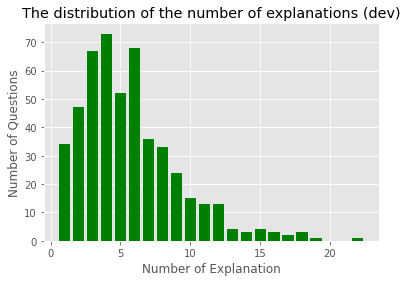

Mean number of explanation: 5.647177419354839
Max number of explanation: 22
time: 277 ms


In [8]:
num_distribution = []

for _, question in dev_set.iterrows():
    if pd.isna(question["explanation"]):
        num_distribution.append(0)
    else:
        num_distribution.append(len(question["explanation"].split()))

counter = Counter(num_distribution)
x = sorted(counter)
y = [counter[n] for n in x]
        


plt.bar(x, y, color='green')
plt.xlabel("Number of Explanation")
plt.ylabel("Number of Questions")
plt.title("The distribution of the number of explanations (dev)")
plt.show()

print(f"Mean number of explanation: {np.mean(num_distribution)}")
print(f"Max number of explanation: {max(x)}")

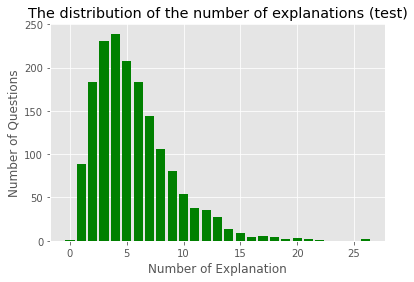

Mean number of explanation: 5.6015625
Max number of explanation: 26
time: 461 ms


In [9]:
num_distribution = []

for _, question in test_set.iterrows():
    if pd.isna(question["explanation"]):
        num_distribution.append(0)
    else:
        num_distribution.append(len(question["explanation"].split()))

counter = Counter(num_distribution)
x = sorted(counter)
y = [counter[n] for n in x]
        


plt.bar(x, y, color='green')
plt.xlabel("Number of Explanation")
plt.ylabel("Number of Questions")
plt.title("The distribution of the number of explanations (test)")
plt.show()

print(f"Mean number of explanation: {np.mean(num_distribution)}")
print(f"Max number of explanation: {max(x)}")

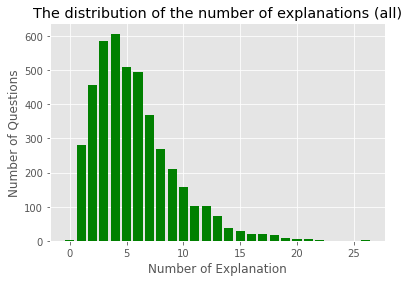

Mean number of explanation: 5.682848637508587
Max number of explanation: 26
time: 638 ms


In [10]:
num_distribution = []

for _, question in all_dataset.iterrows():
    if pd.isna(question["explanation"]):
        num_distribution.append(0)
    else:
        num_distribution.append(len(question["explanation"].split()))

counter = Counter(num_distribution)
x = sorted(counter)
y = [counter[n] for n in x]
        


plt.bar(x, y, color='green')
plt.xlabel("Number of Explanation")
plt.ylabel("Number of Questions")
plt.title("The distribution of the number of explanations (all)")
plt.show()

print(f"Mean number of explanation: {np.mean(num_distribution)}")
print(f"Max number of explanation: {max(x)}")

---
## TableStore

In [30]:
from libs.knowledge_base.utils import load_knowledge_table, load_knowledge_base

time: 1.01 ms


In [26]:
df = pd.read_csv("../WorldtreeExplanationCorpusV2.1_Feb2020/tablestore/v2.1/tables/PROP-MAT-DURABILITY.tsv", delimiter="\t")
for _, row in df.head(10).iterrows():
    field_values = [x for x in row.values[:-4] if not pd.isna(x)]
    print(field_values)

['paper', 'is', 'fragile']
['plastic', 'is', 'durable']
['rubber', 'is', 'durable']
['steel', 'is', 'durable']
['glass', 'is', 'durable']
time: 6.4 ms


In [37]:
KB = load_knowledge_base("../WorldtreeExplanationCorpusV2.1_Feb2020/tablestore/v2.1")

There are 81 tables in total.
There are 9720 pieces of facts in the knowledge base.
time: 1.27 s


---
## Inference patterns